# Testing clustering based on the MFPT

In [2]:
import sys
from nmpath.tools_for_notebook import *
%matplotlib inline
from nmpath.auxfunctions import *
from nmpath.mfpt import *
from nmpath.mappers import rectilinear_mapper
from nmpath.clustering import *
#from nmpath.mappers import voronoi_mapper

## Toy model with two basins

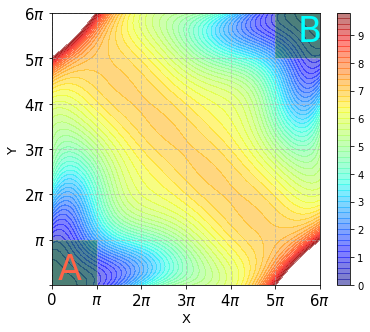

In [3]:
plot_traj([],[],figsize=(6,5))

## Generating MC trajectory

### Continuos Ensemble

In [4]:
mc_traj = mc_simulation2D(500000)
my_ensemble = Ensemble([mc_traj])

### Discrete Ensemble and Transition Matrix

The mapping funcion divides each dimension in 12. The total number of bins is 144.

In [5]:
discrete_ens = DiscreteEnsemble.from_ensemble(my_ensemble, mapping_function2D)

# Transition Matrix
K = discrete_ens._mle_transition_matrix(N*N,prior_counts=1e-6)

## Agglomerative Clustering

The points with the same color belong to the same cluster, only the clusters with size > 1 are shown.

135 Clusters, t_cut: 122.74tau, t_max: 6.94e+09tau, tAB: 6419.41tau


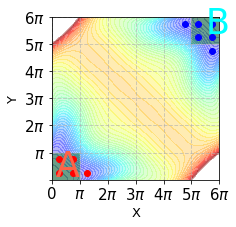

130 Clusters, t_cut: 198.91tau, t_max: 6.94e+09tau, tAB: 6379.83tau


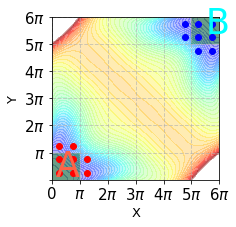

125 Clusters, t_cut: 303.04tau, t_max: 6.94e+09tau, tAB: 6332.23tau


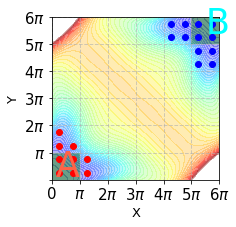

120 Clusters, t_cut: 520.35tau, t_max: 6.94e+09tau, tAB: 6284.95tau


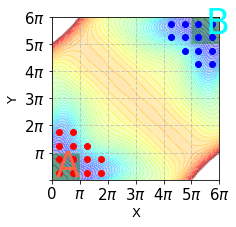

115 Clusters, t_cut: 802.92tau, t_max: 6.94e+09tau, tAB: 6206.41tau


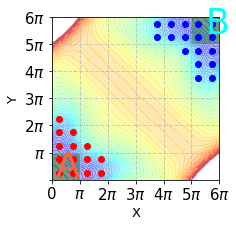

110 Clusters, t_cut: 1125.72tau, t_max: 6.94e+09tau, tAB: 6127.47tau


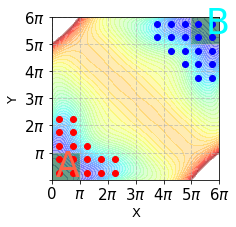

105 Clusters, t_cut: 1313.22tau, t_max: 6.94e+09tau, tAB: 6023.50tau


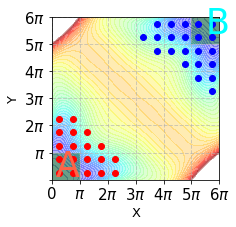

100 Clusters, t_cut: 1845.00tau, t_max: 6.94e+09tau, tAB: 5899.08tau


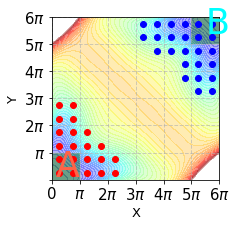

95 Clusters, t_cut: 2253.17tau, t_max: 6.94e+09tau, tAB: 5795.71tau


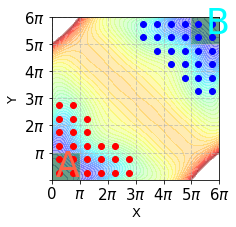

90 Clusters, t_cut: 3047.49tau, t_max: 6.94e+09tau, tAB: 5639.45tau


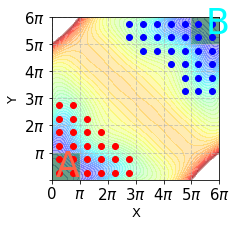

85 Clusters, t_cut: 3377.85tau, t_max: 6.94e+09tau, tAB: 5458.99tau


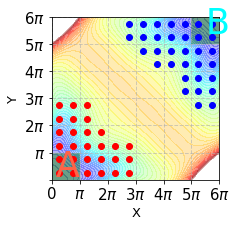

80 Clusters, t_cut: 4159.00tau, t_max: 6.94e+09tau, tAB: 5251.72tau


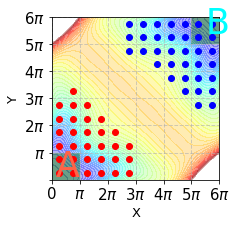

75 Clusters, t_cut: 4600.92tau, t_max: 6.94e+09tau, tAB: 5106.51tau


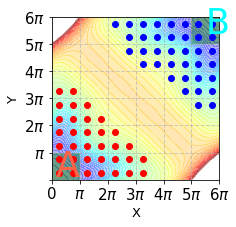

70 Clusters, t_cut: 5496.63tau, t_max: 6.94e+09tau, tAB: 0.00tau


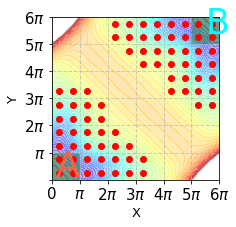

In [6]:
t_min_list=[]
t_max_list=[]
t_AB_list=[]
n_clusters = [135, 130, 125, 120, 115, 110, 105, 100, 95, 90, 85, 80, 75, 70]

for n in n_clusters:
    big_clusters=[]
    big_clusters_index =[]
    clusters, t_min, t_max, clustered_tmatrix = kinetic_clustering_from_tmatrix(K, n, verbose=False)
    t_min_list.append(t_min)
    t_max_list.append(t_max)
    
    for i, cluster in enumerate(clusters):
        if len(cluster) > 1:
            big_clusters.append(cluster)
            big_clusters_index.append(i)
            
    n_big = len(big_clusters)
    
    if n_big > 1:
        tAB = markov_commute_time(clustered_tmatrix,[big_clusters_index[0]],[big_clusters_index[1]] )
    else:
        tAB = 0.0
    t_AB_list.append(tAB)
    
    discrete = [True for i in range(n_big)]
    
    print("{} Clusters, t_cut: {:.2f}tau, t_max: {:.2e}tau, tAB: {:.2f}tau".format(n, t_min, t_max, tAB))
    plot_traj([ [big_clusters[i],[]] for i in range(n_big) ], 
              discrete, std = 0.00002, alpha=0.3, justpoints=True, figsize=(3,3))

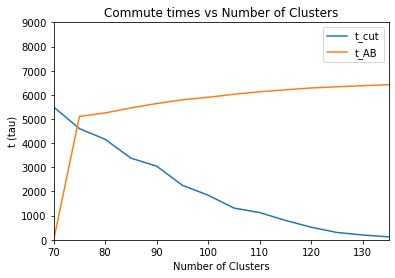

In [8]:
plt.plot(n_clusters, t_min_list, label="t_cut")
plt.plot(n_clusters, t_AB_list, label="t_AB")
plt.xlabel("Number of Clusters")
plt.ylabel("t (tau)")
#plt.text(110, 4000,"Clustering", fontsize=14)
plt.axis([70,135,0,9000])
#plt.arrow(125, 3600, -30, 0,shape='left', lw=2, length_includes_head=True)
plt.title("Commute times vs Number of Clusters")
plt.legend()
plt.show()

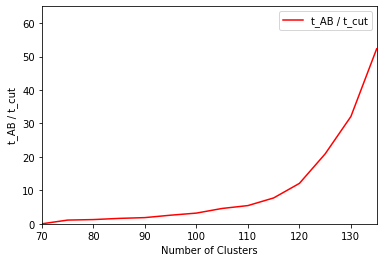

In [9]:
m_ratio = [t_AB_list[i]/t_min_list[i] for i in range(len(t_min_list))]

plt.plot(n_clusters, m_ratio, label="t_AB / t_cut", color="red")
plt.xlabel("Number of Clusters")
plt.ylabel("t_AB / t_cut")
plt.axis([70,135,0,65])
plt.legend()
plt.show()

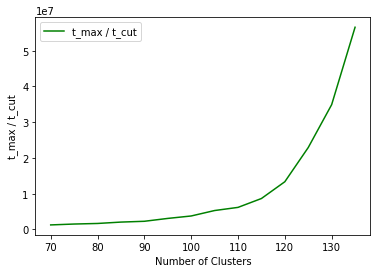

In [10]:
m_ratio2 = [t_max_list[i]/t_min_list[i] for i in range(len(t_min_list))]

plt.plot(n_clusters, m_ratio2, label="t_max / t_cut", color="green")
plt.xlabel("Number of Clusters")
plt.ylabel("t_max / t_cut")
#plt.axis([70,135,0,1000])
plt.legend()
plt.show()